# EDA and modeling

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

## EDA

In [2]:
files =os.listdir('./temperature and precipitation/')
files

['USW00003822.csv',
 'USW00024286.csv',
 'USW00013833.csv',
 'USW00023066.csv',
 'USW00093821.csv',
 'USW00024127.csv',
 'USW00014972.csv',
 'USW00013984.csv',
 'USW00003017.csv',
 'USW00014768.csv',
 'USW00013985.csv',
 'USW00094815.csv',
 'USW00093820.csv',
 'USW00094008.csv',
 'USW00094746.csv',
 'USW00094949.csv',
 'USW00094236.csv',
 'USW00023271.csv',
 'USW00014839.csv',
 'USW00023065.csv',
 'consolidated_df.csv',
 'USW00093822.csv',
 'USW00014742.csv',
 'USW00003940.csv',
 'USW00024131.csv',
 'USC00042863.csv',
 'USW00003820.csv',
 'USW00024257.csv',
 'USW00003171.csv',
 'USW00024121.csv',
 'USW00013996.csv',
 'USW00014753.csv',
 'USW00003945.csv',
 'USW00013968.csv',
 'USW00094973.csv',
 'USW00094224.csv',
 'USW00023275.csv',
 'USW00093824.csv',
 'USW00013942.csv',
 'USW00014778.csv',
 'USW00014750.csv',
 'USW00013995.csv',
 'USW00003953.csv',
 'USW00003947.csv',
 'USW00014745.csv',
 'USW00013994.csv',
 'USC00286055.csv',
 'USW00013957.csv',
 'USW00014792.csv',
 'USW00093819.cs

In [3]:
files.remove('.ipynb_checkpoints')


In [4]:
files

['USW00003822.csv',
 'USW00024286.csv',
 'USW00013833.csv',
 'USW00023066.csv',
 'USW00093821.csv',
 'USW00024127.csv',
 'USW00014972.csv',
 'USW00013984.csv',
 'USW00003017.csv',
 'USW00014768.csv',
 'USW00013985.csv',
 'USW00094815.csv',
 'USW00093820.csv',
 'USW00094008.csv',
 'USW00094746.csv',
 'USW00094949.csv',
 'USW00094236.csv',
 'USW00023271.csv',
 'USW00014839.csv',
 'USW00023065.csv',
 'consolidated_df.csv',
 'USW00093822.csv',
 'USW00014742.csv',
 'USW00003940.csv',
 'USW00024131.csv',
 'USC00042863.csv',
 'USW00003820.csv',
 'USW00024257.csv',
 'USW00003171.csv',
 'USW00024121.csv',
 'USW00013996.csv',
 'USW00014753.csv',
 'USW00003945.csv',
 'USW00013968.csv',
 'USW00094973.csv',
 'USW00094224.csv',
 'USW00023275.csv',
 'USW00093824.csv',
 'USW00013942.csv',
 'USW00014778.csv',
 'USW00014750.csv',
 'USW00013995.csv',
 'USW00003953.csv',
 'USW00003947.csv',
 'USW00014745.csv',
 'USW00013994.csv',
 'USC00286055.csv',
 'USW00013957.csv',
 'USW00014792.csv',
 'USW00093819.cs

In [5]:
file_list=[]
for file in files:
    df=pd.read_csv('./temperature and precipitation/'+file, index_col=None)
    df['filename']=os.path.basename(file)
    file_list.append(df)
    
frame =pd.concat(file_list, axis=0, ignore_index=True)
#https://stackoverflow.com/questions/41857659/python-pandas-add-filename-column-csv
#https://stackoverflow.com/questions/66431680/combine-multiple-csv-files-datasets-to-make-a-joint-one

In [6]:
frame['filename']=frame['filename'].str.replace('.csv','')

<ipython-input-6-309efc490c64>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  frame['filename']=frame['filename'].str.replace('.csv','')


In [7]:
frame.head()

,Unnamed: 0,Date,tmax,tmin,prcp,filename,Unnamed: 0.1
0,1,1871-01-01,NaN,NaN,0.0,USW00003822,NaN
1,2,1871-01-02,NaN,NaN,0.0,USW00003822,NaN
2,3,1871-01-03,NaN,NaN,0.0,USW00003822,NaN
3,4,1871-01-04,NaN,NaN,0.0,USW00003822,NaN
4,5,1871-01-05,NaN,NaN,0.0,USW00003822,NaN


In [8]:
frame.to_csv('./temperature and precipitation/consolidated_df.csv')

In [18]:
frame=pd.read_csv('./temperature and precipitation/consolidated_df.csv')
frame.head()

,Unnamed: 0,Unnamed: 0.1,Date,tmax,tmin,prcp,filename,Unnamed: 0.1.1
0,0,1,1871-01-01,NaN,NaN,0.0,USW00003822,NaN
1,1,2,1871-01-02,NaN,NaN,0.0,USW00003822,NaN
2,2,3,1871-01-03,NaN,NaN,0.0,USW00003822,NaN
3,3,4,1871-01-04,NaN,NaN,0.0,USW00003822,NaN
4,4,5,1871-01-05,NaN,NaN,0.0,USW00003822,NaN


In [20]:
frame.drop(columns=['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'], inplace=True)

In [21]:
frame.shape

(20798528, 5)

In [22]:
frame.isnull().sum()

Date              0
tmax        1167008
tmin        1165210
prcp        1050446
filename          0
dtype: int64

In [23]:
frame.dtypes

Date         object
tmax        float64
tmin        float64
prcp        float64
filename     object
dtype: object

In [24]:
imp = SimpleImputer(strategy='mean')
features=['tmax','tmin','prcp']
imp_frame=imp.fit_transform(frame[features])
imp_df=pd.DataFrame(imp_frame, columns = frame[features].columns)

In [27]:
imp_df.isnull().sum()

tmax    0
tmin    0
prcp    0
dtype: int64

In [33]:
new_df=pd.concat([imp_df,frame[['Date','filename']]], axis=1)
new_df.head()

,tmax,tmin,prcp,Date,filename
0,65.7302,44.681459,0.0,1871-01-01,USW00003822
1,65.7302,44.681459,0.0,1871-01-02,USW00003822
2,65.7302,44.681459,0.0,1871-01-03,USW00003822
3,65.7302,44.681459,0.0,1871-01-04,USW00003822
4,65.7302,44.681459,0.0,1871-01-05,USW00003822


In [34]:
new_df.to_csv('./temperature and precipitation/cleaned_data.csv')

In [35]:
new_df['tmid']=(new_df['tmax']+new_df['tmin'])/2

In [36]:
new_df.head()

,tmax,tmin,prcp,Date,filename,tmid
0,65.7302,44.681459,0.0,1871-01-01,USW00003822,55.205829
1,65.7302,44.681459,0.0,1871-01-02,USW00003822,55.205829
2,65.7302,44.681459,0.0,1871-01-03,USW00003822,55.205829
3,65.7302,44.681459,0.0,1871-01-04,USW00003822,55.205829
4,65.7302,44.681459,0.0,1871-01-05,USW00003822,55.205829


In [37]:
new_df['prcp'].value_counts()

0.000000     13989250
0.094554      1050446
0.010000       567522
0.020000       414226
0.030000       291878
               ...   
22.750000           2
9.300000            2
9.020000            2
6.090000            2
15.290000           2
Name: prcp, Length: 930, dtype: int64

In [38]:
new_df['if_prcp']=(new_df['prcp']>0).astype(int)
new_df.head()

,tmax,tmin,prcp,Date,filename,tmid,if_prcp
0,65.7302,44.681459,0.0,1871-01-01,USW00003822,55.205829,0
1,65.7302,44.681459,0.0,1871-01-02,USW00003822,55.205829,0
2,65.7302,44.681459,0.0,1871-01-03,USW00003822,55.205829,0
3,65.7302,44.681459,0.0,1871-01-04,USW00003822,55.205829,0
4,65.7302,44.681459,0.0,1871-01-05,USW00003822,55.205829,0


In [39]:
new_df['if_prcp'].value_counts()

0    13989250
1     6809278
Name: if_prcp, dtype: int64

In [57]:
new_df.shape

(20798528, 7)

In [45]:
maize=pd.read_csv('./temperature and precipitation/CD_maize.csv')
maize.head()

,Unnamed: 0,101,102,103,104,105,106,107,108,301,...,4606,4701,4702,4703,4704,4705,4706,4707,4708,4709
0,1950,27.289453,32.067659,22.493444,27.461494,20.773350,15.951721,14.607535,37.260355,24.098173,...,38.017187,37.668909,38.654164,27.205987,45.310395,41.091657,48.575438,51.259606,53.445010,52.889171
1,1951,22.215551,27.827992,17.989835,22.794863,17.340542,12.173321,15.830695,42.029935,19.247822,...,38.008671,34.672010,34.563217,23.391356,44.197532,47.662997,52.374376,53.921120,55.429383,53.242110
2,1952,10.726310,14.310425,10.477121,13.765021,10.866387,8.216800,10.579451,26.209344,23.240380,...,42.292889,50.171507,45.328842,26.931774,59.615267,56.870400,65.224983,69.428663,68.368681,67.921275
3,1953,23.846376,29.482365,22.834477,27.170303,22.734058,16.688217,18.600754,26.599185,23.424697,...,34.015707,49.884150,43.736522,24.628341,58.435782,56.318850,65.142001,64.772824,66.533859,64.519410
4,1954,11.198050,14.879065,10.688809,15.028371,13.219078,9.978812,13.848827,26.591350,16.548009,...,45.448218,49.993615,51.162785,27.031684,53.828437,53.888599,59.998124,64.296327,69.043761,66.033839


In [50]:
maize.rename(columns={'Unnamed: 0':'year'},inplace=True)

In [53]:
maize

,year,101,102,103,104,105,106,107,108,301,...,4606,4701,4702,4703,4704,4705,4706,4707,4708,4709
0,1950,27.289453,32.067659,22.493444,27.461494,20.773350,15.951721,14.607535,37.260355,24.098173,...,38.017187,37.668909,38.654164,27.205987,45.310395,41.091657,48.575438,51.259606,53.445010,52.889171
1,1951,22.215551,27.827992,17.989835,22.794863,17.340542,12.173321,15.830695,42.029935,19.247822,...,38.008671,34.672010,34.563217,23.391356,44.197532,47.662997,52.374376,53.921120,55.429383,53.242110
2,1952,10.726310,14.310425,10.477121,13.765021,10.866387,8.216800,10.579451,26.209344,23.240380,...,42.292889,50.171507,45.328842,26.931774,59.615267,56.870400,65.224983,69.428663,68.368681,67.921275
3,1953,23.846376,29.482365,22.834477,27.170303,22.734058,16.688217,18.600754,26.599185,23.424697,...,34.015707,49.884150,43.736522,24.628341,58.435782,56.318850,65.142001,64.772824,66.533859,64.519410
4,1954,11.198050,14.879065,10.688809,15.028371,13.219078,9.978812,13.848827,26.591350,16.548009,...,45.448218,49.993615,51.162785,27.031684,53.828437,53.888599,59.998124,64.296327,69.043761,66.033839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,2012,89.847956,104.963561,101.709731,115.266311,204.087264,125.892085,109.152527,123.300000,103.500000,...,134.932145,127.140702,115.575771,147.429367,143.019504,110.294572,138.131332,104.986444,113.477221,112.210484
63,2013,165.409834,133.451470,126.728906,139.648251,149.920484,124.826811,120.330502,157.851954,103.500000,...,153.307727,103.946630,126.069429,151.538633,125.236230,132.532132,155.676267,163.419789,166.425016,157.484626
64,2014,182.432478,148.593686,141.187281,135.699744,99.200000,136.130769,131.729443,138.900000,103.500000,...,156.016789,117.702386,128.078332,126.215881,147.687728,153.962329,145.312883,172.532976,174.777638,176.810215
65,2015,161.431656,149.044855,129.381680,120.318297,180.778028,127.700000,136.984239,147.200000,103.500000,...,158.701070,148.216728,137.036208,132.573731,163.284374,154.952345,164.895292,172.783389,178.165798,177.820174


In [54]:
maize.isnull().sum()

year    0
101     0
102     0
103     0
104     0
       ..
4705    0
4706    0
4707    0
4708    0
4709    0
Length: 241, dtype: int64

In [55]:
maize.dtypes

year      int64
101     float64
102     float64
103     float64
104     float64
         ...   
4705    float64
4706    float64
4707    float64
4708    float64
4709    float64
Length: 241, dtype: object

In [59]:
new_df.head(1)

,tmax,tmin,prcp,Date,filename,tmid,if_prcp
0,65.7302,44.681459,0.0,1871-01-01,USW00003822,55.205829,0


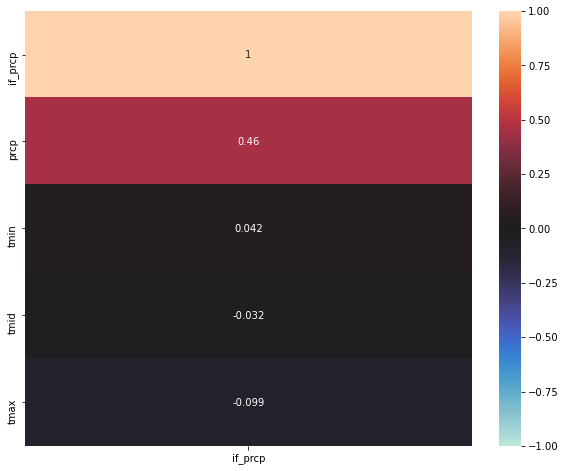

In [63]:
plt.figure(figsize=(10,8))
sns.heatmap(new_df.corr()[['if_prcp']].sort_values(by='if_prcp', ascending=False),
            annot=True,
            vmin=-1,
            vmax=1,
            cmap='icefire');

In [ ]:
features=['prcp', 'tmin','tmax','tmid']
X=new_df[features]
y=new_df['if_prcp']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify=y, random_state=42)

pipe_log=Pipeline([
    ('ss', StandardScaler()),
    ('lr',LogisticRegression(solver='liblinear')),
])

pipe_log.fit(X_train, y_train)